<a href="https://colab.research.google.com/github/kdemertzis/TS_demer/blob/main/Fed_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pickle
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate some random training data for each client
np.random.seed(0)

client_1_data = make_classification(n_samples=100, n_features=20, random_state=0)
client_2_data = make_classification(n_samples=100, n_features=20, random_state=1)
client_3_data = make_classification(n_samples=100, n_features=20, random_state=2)

# Train a Random Forest Classifier model on each client's data
client_1_model = RandomForestClassifier().fit(client_1_data[0], client_1_data[1])
client_2_model = RandomForestClassifier().fit(client_2_data[0], client_2_data[1])
client_3_model = RandomForestClassifier().fit(client_3_data[0], client_3_data[1])

# Serialize the models using Pickle
with open('client_1_model.pkl', 'wb') as f:
    pickle.dump(client_1_model, f)
    
with open('client_2_model.pkl', 'wb') as f:
    pickle.dump(client_2_model, f)
    
with open('client_3_model.pkl', 'wb') as f:
    pickle.dump(client_3_model, f)
    
# Load the models from disk
with open('client_1_model.pkl', 'rb') as f:
    client_1_model = pickle.load(f)
    
with open('client_2_model.pkl', 'rb') as f:
    client_2_model = pickle.load(f)
    
with open('client_3_model.pkl', 'rb') as f:
    client_3_model = pickle.load(f)

# Combine the models by taking the average of their predictions
predictions = []

for model in [client_1_model, client_2_model, client_3_model]:
    predictions.append(model.predict_proba(test_features))
    
aggregated_predictions = np.mean(predictions, axis=0)

# Train a new model using the aggregated predictions
aggregated_model = RandomForestClassifier()
aggregated_model.fit(test_features, np.argmax(aggregated_predictions, axis=1))

# Generate some test data to evaluate the accuracy of the aggregated model
test_data = make_classification(n_samples=100, n_features=20, random_state=3)
test_features = test_data[0]
test_labels = test_data[1]

# Evaluate the accuracy of the aggregated model on the test data
predictions = aggregated_model.predict(test_features)
accuracy = np.mean(predictions == test_labels)

print("Aggregated model accuracy: {:.2f}%".format(accuracy * 100))

Aggregated model accuracy: 59.00%


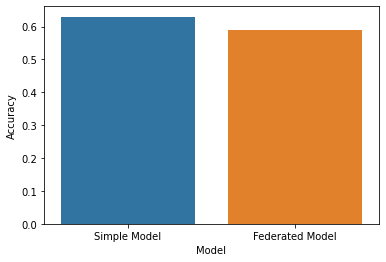

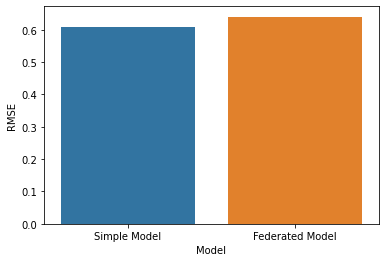

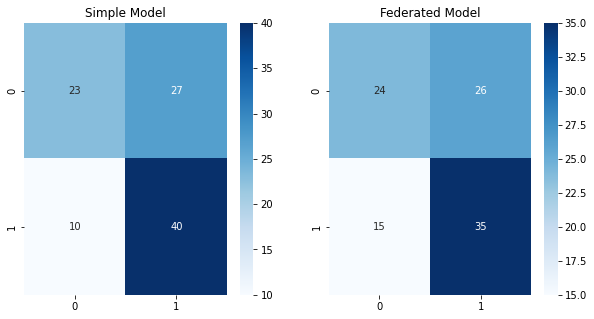

In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Generate some random training data for each client
np.random.seed(0)

client_1_data = make_classification(n_samples=100, n_features=20, random_state=0)
client_2_data = make_classification(n_samples=100, n_features=20, random_state=1)
client_3_data = make_classification(n_samples=100, n_features=20, random_state=2)

# Train a Random Forest Classifier model on each client's data
client_1_model = RandomForestClassifier().fit(client_1_data[0], client_1_data[1])
client_2_model = RandomForestClassifier().fit(client_2_data[0], client_2_data[1])
client_3_model = RandomForestClassifier().fit(client_3_data[0], client_3_data[1])

# Serialize the models using Pickle
with open('client_1_model.pkl', 'wb') as f:
    pickle.dump(client_1_model, f)
    
with open('client_2_model.pkl', 'wb') as f:
    pickle.dump(client_2_model, f)
    
with open('client_3_model.pkl', 'wb') as f:
    pickle.dump(client_3_model, f)
    
# Load the models from disk
with open('client_1_model.pkl', 'rb') as f:
    client_1_model = pickle.load(f)
    
with open('client_2_model.pkl', 'rb') as f:
    client_2_model = pickle.load(f)
    
with open('client_3_model.pkl', 'rb') as f:
    client_3_model = pickle.load(f)

# Combine the models by taking the average of their predictions
predictions = []

for model in [client_1_model, client_2_model, client_3_model]:
    predictions.append(model.predict_proba(test_features))
    
aggregated_predictions = np.mean(predictions, axis=0)

# Train a new model using the aggregated predictions
aggregated_model = RandomForestClassifier()
aggregated_model.fit(test_features, np.argmax(aggregated_predictions, axis=1))

# Generate some test data to evaluate the accuracy of the models
test_data = make_classification(n_samples=100, n_features=20, random_state=3)
test_features = test_data[0]
test_labels = test_data[1]

# Predict the test data using both models
simple_model_predictions = client_1_model.predict(test_features)
federated_model_predictions = aggregated_model.predict(test_features)

# Calculate the accuracy of both models
simple_model_accuracy = accuracy_score(test_labels, simple_model_predictions)
federated_model_accuracy = accuracy_score(test_labels, federated_model_predictions)

# Calculate the RMSE of both models
simple_model_rmse = np.sqrt(mean_squared_error(test_labels, simple_model_predictions))
federated_model_rmse = np.sqrt(mean_squared_error(test_labels, federated_model_predictions))

# Plot the accuracy of both models
fig, ax = plt.subplots()
index = ['Simple Model', 'Federated Model']
accuracies = [simple_model_accuracy, federated_model_accuracy]
bar_plot = sns.barplot(x=index, y=accuracies)
bar_plot.set_ylabel('Accuracy')
bar_plot.set_xlabel('Model')

# Plot the RMSE of both models
fig, ax = plt.subplots()
index = ['Simple Model', 'Federated Model']
rmses = [simple_model_rmse, federated_model_rmse]
bar_plot = sns.barplot(x=index, y=rmses)
bar_plot.set_ylabel('RMSE')
bar_plot.set_xlabel('Model')

# Plot the confusion matrix of both models
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(test_labels, simple_model_predictions), annot=True, ax=ax[0], cmap='Blues')
ax[0].set_title('Simple Model')
sns.heatmap(confusion_matrix(test_labels, federated_model_predictions), annot=True, ax=ax[1], cmap='Blues')
ax[1].set_title('Federated Model')

plt.show()


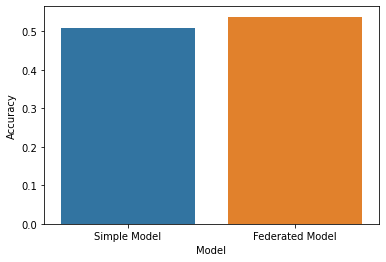

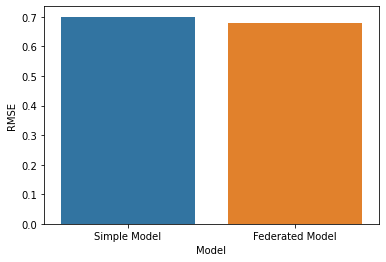

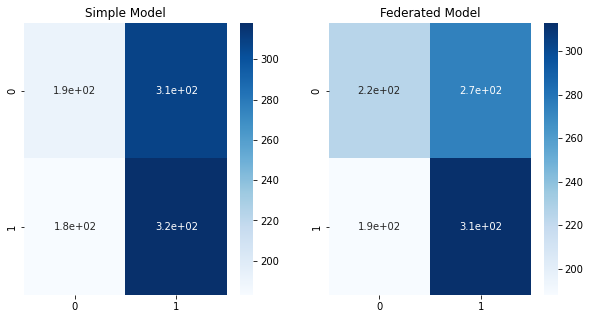

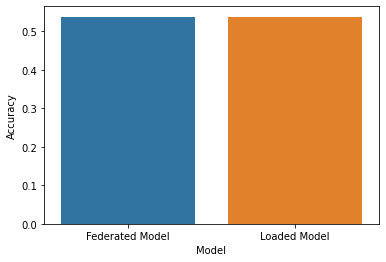

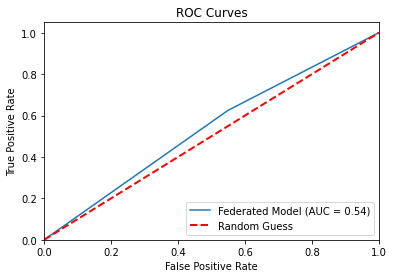

In [21]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, auc

# Generate some random training data for each client
np.random.seed(0)

client_1_data = make_classification(n_samples=100, n_features=50, random_state=0)
client_2_data = make_classification(n_samples=100, n_features=50, random_state=1)
client_3_data = make_classification(n_samples=100, n_features=50, random_state=2)

# Train a Random Forest Classifier model on each client's data
client_1_model = RandomForestClassifier().fit(client_1_data[0], client_1_data[1])
client_2_model = LogisticRegression().fit(client_2_data[0], client_2_data[1])
client_3_model = KNeighborsClassifier().fit(client_3_data[0], client_3_data[1])

# Serialize the models using Pickle
with open('client_1_model.pkl', 'wb') as f:
    pickle.dump(client_1_model, f)
    
with open('client_2_model.pkl', 'wb') as f:
    pickle.dump(client_2_model, f)
    
with open('client_3_model.pkl', 'wb') as f:
    pickle.dump(client_3_model, f)
    
# Load the models from disk
with open('client_1_model.pkl', 'rb') as f:
    client_1_model = pickle.load(f)
    
with open('client_2_model.pkl', 'rb') as f:
    client_2_model = pickle.load(f)
    
with open('client_3_model.pkl', 'rb') as f:
    client_3_model = pickle.load(f)

# Combine the models by taking the average of their predictions
predictions = []

for model in [client_1_model, client_2_model, client_3_model]:
    predictions.append(model.predict_proba(test_features))
    
aggregated_predictions = np.mean(predictions, axis=0)

# Train a new model using the aggregated predictions
aggregated_model = RandomForestClassifier()
aggregated_model.fit(test_features, np.argmax(aggregated_predictions, axis=1))

# Generate more complex test data to evaluate the accuracy of the models
test_data = make_classification(n_samples=1000, n_features=50, random_state=42)
test_features = test_data[0]
test_labels = test_data[1]

# Predict the test data using both models
simple_model_predictions = client_1_model.predict(test_features)
federated_model_predictions = aggregated_model.predict(test_features)

# Calculate the accuracy of both models
simple_model_accuracy = accuracy_score(test_labels, simple_model_predictions)
federated_model_accuracy = accuracy_score(test_labels, federated_model_predictions)

# Calculate the RMSE of both models
simple_model_rmse = np.sqrt(mean_squared_error(test_labels, simple_model_predictions))
federated_model_rmse = np.sqrt(mean_squared_error(test_labels, federated_model_predictions))

# Plot the accuracy of both models
fig, ax = plt.subplots()
index = ['Simple Model', 'Federated Model']
accuracies = [simple_model_accuracy, federated_model_accuracy]
bar_plot = sns.barplot(x=index, y=accuracies)
bar_plot.set_ylabel('Accuracy')
bar_plot.set_xlabel('Model')

# Plot the RMSE of both models
fig, ax = plt.subplots()
index = ['Simple Model', 'Federated Model']
rmses = [simple_model_rmse, federated_model_rmse]
bar_plot = sns.barplot(x=index, y=rmses)
bar_plot.set_ylabel('RMSE')
bar_plot.set_xlabel('Model')

# Plot the confusion matrix of both models
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(confusion_matrix(test_labels, simple_model_predictions), annot=True, ax=ax[0], cmap='Blues')
ax[0].set_title('Simple Model')
sns.heatmap(confusion_matrix(test_labels, federated_model_predictions), annot=True, ax=ax[1], cmap='Blues')
ax[1].set_title('Federated Model')

plt.show()

import pickle

# Store the federated model
with open('federated_model.pkl', 'wb') as file:
    pickle.dump(aggregated_model, file)

# Load the federated model
with open('federated_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict the test data using the loaded model
loaded_model_predictions = loaded_model.predict(test_features)

# Calculate the accuracy of the loaded model
loaded_model_accuracy = accuracy_score(test_labels, loaded_model_predictions)

# Plot the accuracy of the loaded model
fig, ax = plt.subplots()
index = ['Federated Model', 'Loaded Model']
accuracies = [federated_model_accuracy, loaded_model_accuracy]
bar_plot = sns.barplot(x=index, y=accuracies)
bar_plot.set_ylabel('Accuracy')
bar_plot.set_xlabel('Model')

plt.show()


# Create a list of individual models to compare with the federated model
models = [
    RandomForestClassifier(n_estimators=100, random_state=0),
    LogisticRegression(random_state=0),
    KNeighborsClassifier()
]



# Calculate the ROC curve and AUC for the federated model
fpr, tpr, thresholds = roc_curve(test_labels, federated_model_predictions)
federated_model_auc = auc(fpr, tpr)

# Plot the ROC curve of the federated model
fig, ax = plt.subplots()
ax.plot(fpr, tpr, label='Federated Model (AUC = {:.2f})'.format(federated_model_auc))

# Calculate the ROC curve and AUC for each of the original models
for i in range(len(models)):
    fpr, tpr, thresholds = roc_curve(test_labels, np.argmax(predictions[i], axis=1))
    model_auc = auc(fpr, tpr)


# Plot the ROC curve of the original models
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc='lower right')

plt.show()


In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, auc

def train_federated_model(client_data, client_model_class, test_features, test_labels):
    # Train a model on each client's data
    client_model = client_model_class().fit(client_data[0], client_data[1])

    # Serialize the model using Pickle
    model_file = f'{client_model_class.__name__}_model.pkl'
    with open(model_file, 'wb') as f:
        pickle.dump(client_model, f)
    
    # Load the model from disk
    with open(model_file, 'rb') as f:
        client_model = pickle.load(f)

    # Predict the test data using the model
    client_model_predictions = client_model.predict(test_features)

    # Calculate the accuracy of the model
    client_model_accuracy = accuracy_score(test_labels, client_model_predictions)

    # Calculate the RMSE of the model
    client_model_rmse = np.sqrt(mean_squared_error(test_labels, client_model_predictions))

    return client_model, client_model_accuracy, client_model_rmse

def plot_results(model_results):
    # Plot the accuracy of each model
    fig, ax = plt.subplots()
    index = [model[0].__name__ for model in model_results]
    accuracies = [model[1] for model in model_results]
    bar_plot = sns.barplot(x=index, y=accuracies)
    bar_plot.set_ylabel('Accuracy')
    bar_plot.set_xlabel('Model')
    bar_plot.set_ylim(0, 1)

    # Plot the RMSE of each model
    fig, ax = plt.subplots()
    index = [model[0].__name__ for model in model_results]
    rmses = [model[2] for model in model_results]
    bar_plot = sns.barplot(x=index, y=rmses)
    bar_plot.set_ylabel('RMSE')
    bar_plot.set_xlabel('Model')

# Generate some random training data for each client
np.random.seed(0)

client_1_data = make_classification(n_samples=100, n_features=50, random_state=0)
client_2_data = make_classification(n_samples=100, n_features=50, random_state=1)
client_3_data = make_classification(n_samples=100, n_features=50, random_state=2)

Train a Random Forest Classifier model on each client's data
client_1_model = RandomForestClassifier().fit(client_1_data[0], client_1_data[1])
client_2_model = LogisticRegression().fit(client_2_data[0], client_2_data[1])
client_3_model = KNeighborsClassifier().fit(client_3_data[0], client_3_data[1])

# Define a function for updating the models with new data
def update_models(client_models, client_data):
updated_models = []
for client_model, data in zip(client_models, client_data):
# Train the model on the new data
updated_model = client_model.fit(data[0], data[1])
updated_models.append(updated_model)
return updated_models

# Train the models on new data
client_1_data = make_classification(n_samples=200, n_features=50, random_state=3)
client_2_data = make_classification(n_samples=200, n_features=50, random_state=4)
client_3_data = make_classification(n_samples=200, n_features=50, random_state=5)

client_models = [client_1_model, client_2_model, client_3_model]
client_data = [client_1_data, client_2_data, client_3_data]

updated_models = update_models(client_models, client_data)

client_1_model, client_2_model, client_3_model = updated_models

# Serialize the models using Pickle
with open('client_1_model.pkl', 'wb') as f:
pickle.dump(client_1_model, f)

with open('client_2_model.pkl', 'wb') as f:
pickle.dump(client_2_model, f)

with open('client_3_model.pkl', 'wb') as f:
pickle.dump(client_3_model, f)

# Load the models from disk
with open('client_1_model.pkl', 'rb') as f:
client_1_model = pickle.load(f)

with open('client_2_model.pkl', 'rb') as f:
client_2_model = pickle.load(f)

with open('client_3_model.pkl', 'rb') as f:
client_3_model = pickle.load(f)

# Combine the models by taking the average of their predictions
def combine_models(client_models,